# Install

In [1]:
!pip install biodivine_aeon==1.3.0a3 -qq > /dev/null 2>&1
!pip install SPARQLWrapper networkx matplotlib -qq > /dev/null 2>&1
!apt-get install graphviz graphviz-dev -y -qq > /dev/null 2>&1
!pip install pygraphviz -qq > /dev/null 2>&1

# Import

In [2]:
from biodivine_aeon import *

In [3]:
from EnrichmentClasses import (EnrichmentPSBN)

In [4]:
from Visualization import (
    get_quickgo_terms_batch,
    set_nodes_for_graph,
    make_graph,
    visualize_subgraphs,
    get_roots_and_leafs,
    sort_roots_and_leafs,
    visualize_subgraphs_on_whole_net,
    print_roots_and_leafs_on_whole_net,
    visualize_subgraphs_on_each_instance,
    print_roots_and_leafs_per_instance,
    visualize_unmapped_nodes_frequencies,
    visualize_mapped_nodes_frequencies,
)

In [5]:
from Pipeline import pipeline

In [6]:
from CheckFixedPoints import print_fixed_points_on_new_stg

# Data + reference genome

In [7]:
network = BooleanNetwork.from_file("test_case.aeon")

In [8]:
human_id = "9606"

# Test case

In [9]:
psbn = EnrichmentPSBN([])
pipeline(psbn, network, human_id, "test_case")

In [10]:
print(psbn.instances[0].attractors[0].unmapped_ids_set)
print(psbn.instances[1].attractors[0].unmapped_ids_set)
print(psbn.instances[0].attractors[0].mapped_ids)
print(psbn.instances[1].attractors[0].mapped_ids)

{'Apoptosis'}
{'Survival', 'Infliximab_drug'}
IKBKB,CASP8,TNF,NFKB1,TNFRSF1A
NFKBIA


In [11]:
output_nodes = {"Apoptosis", "Survival"}

## Terms frequencies

In [12]:
freqs = psbn.count_goterms_frequencies_in_all_instances()
sorted_freqs = sorted(freqs.items(), key=lambda item: item[1], reverse=True)

print(f"In total number of attractors: {psbn.count_attractors()}, 10 most frequent terms are:")
for term, frequency in sorted_freqs[:10]:
  print(f"{term}: {frequency}")

In total number of attractors: 2, 10 most frequent terms are:
+response to tumor necrosis factor: 1
+canonical NF-kappaB signal transduction: 1
+tumor necrosis factor-mediated signaling pathway: 1
+regulation of establishment of endothelial barrier: 1
+regulation of endothelial cell development: 1
+cellular response to tumor necrosis factor: 1
+inflammatory response: 1
+regulation of endothelial cell differentiation: 1
+response to mechanical stimulus: 1
+positive regulation of canonical NF-kappaB signal transduction: 1


## Graphs

In [13]:
visualize_subgraphs_on_whole_net(psbn)

[0] ColorModel({'Infliximab_drug': 'false'})


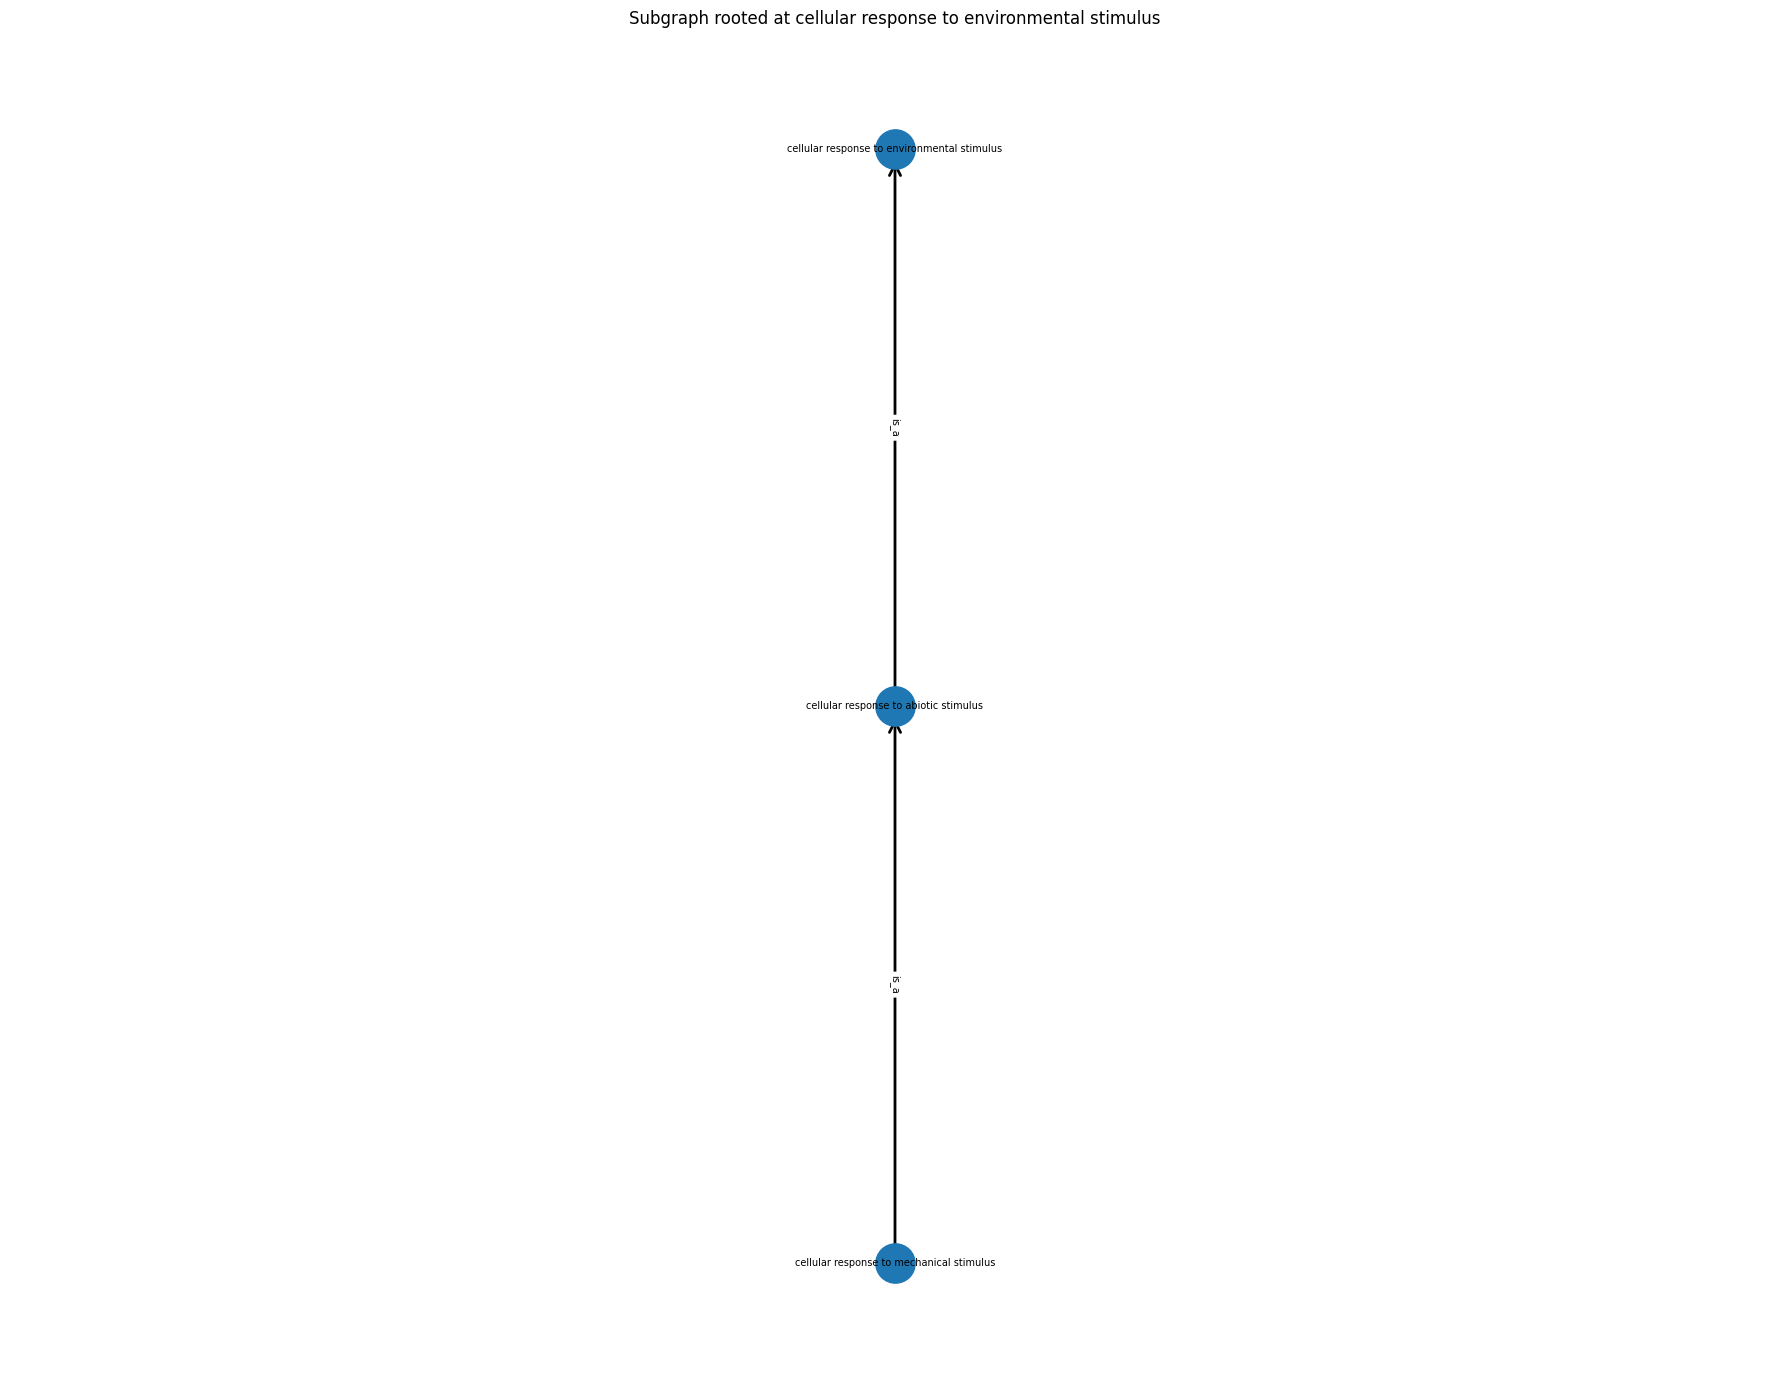

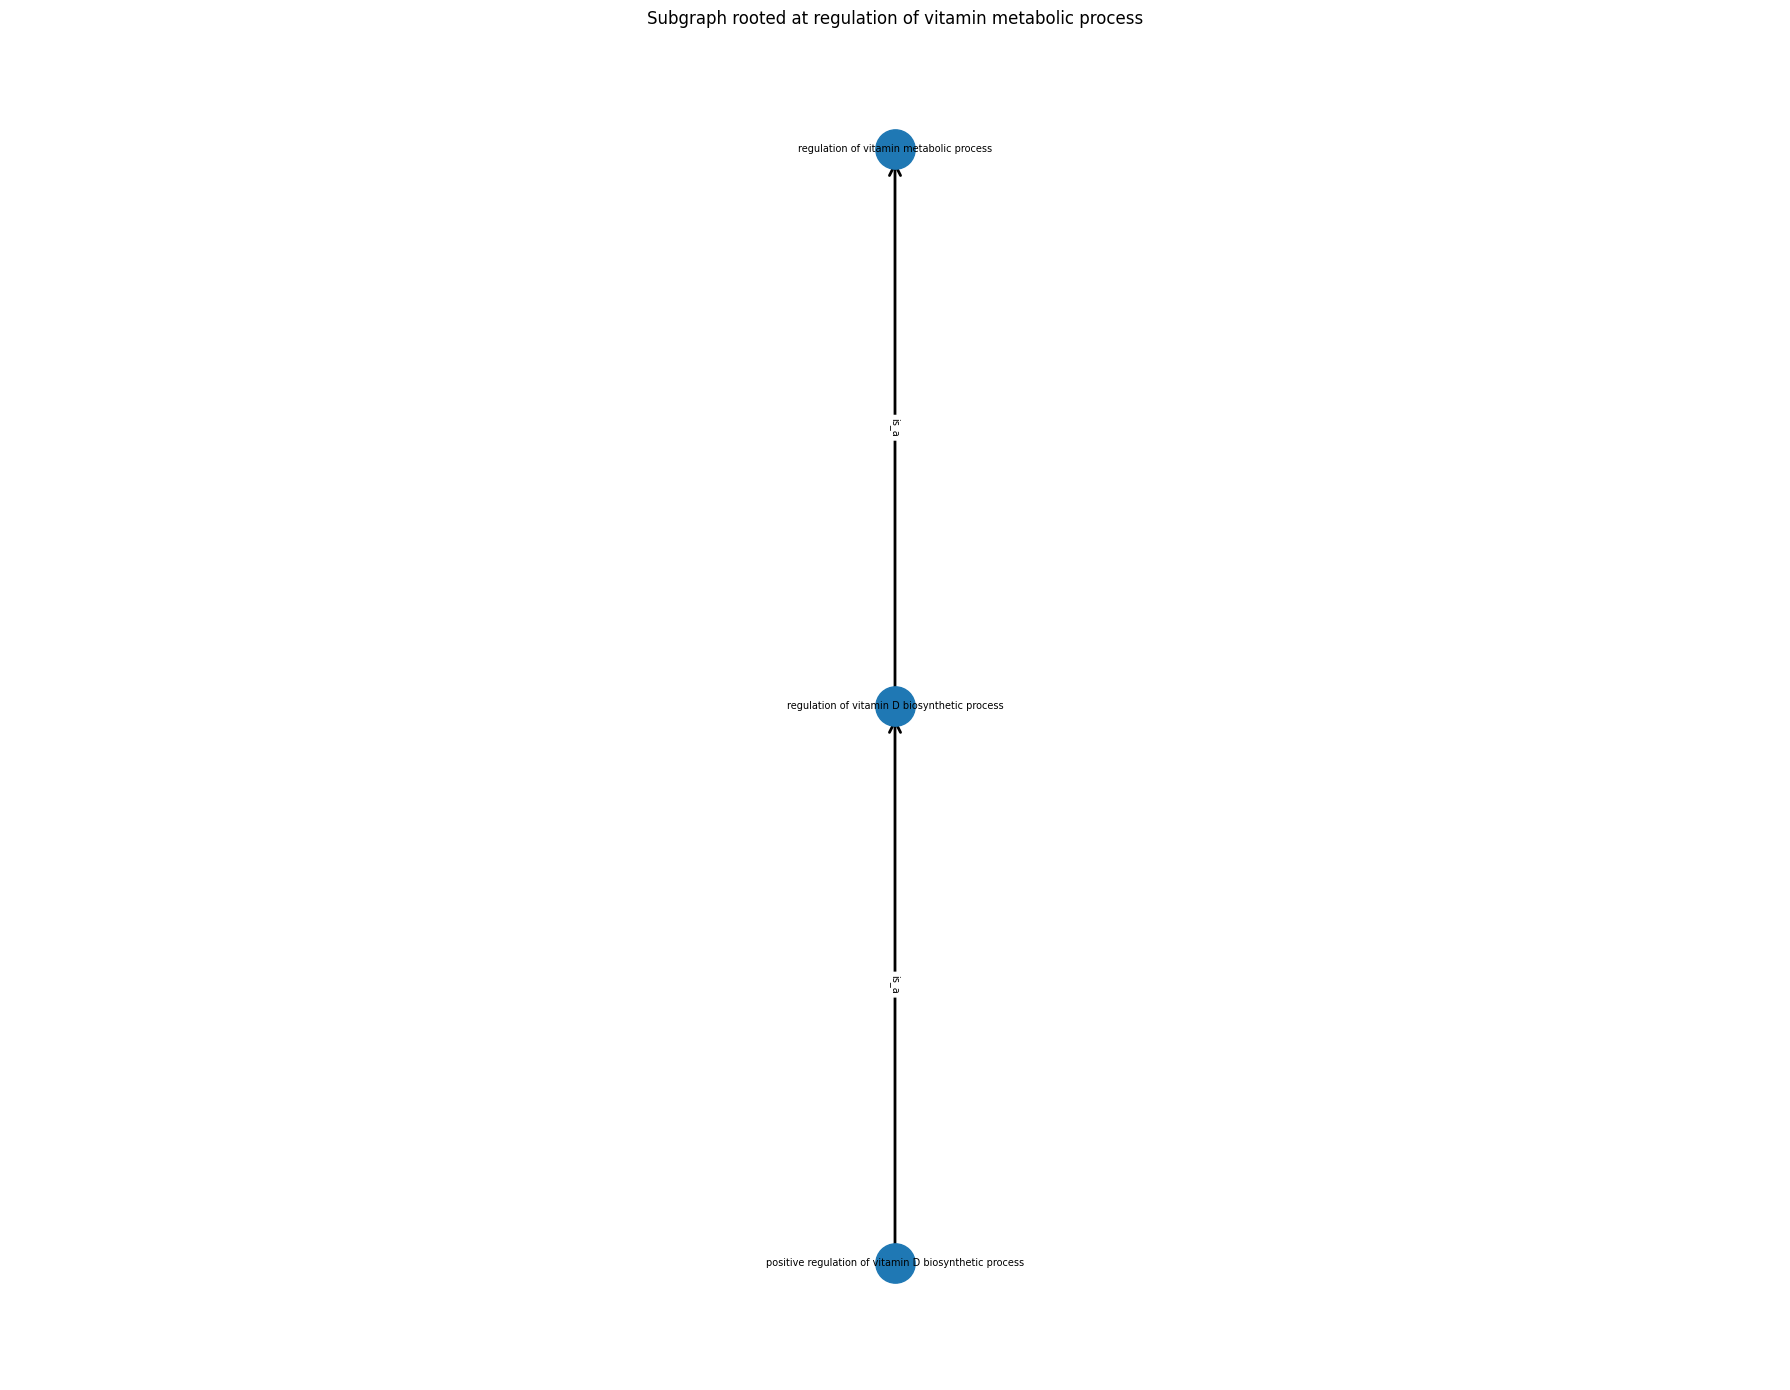

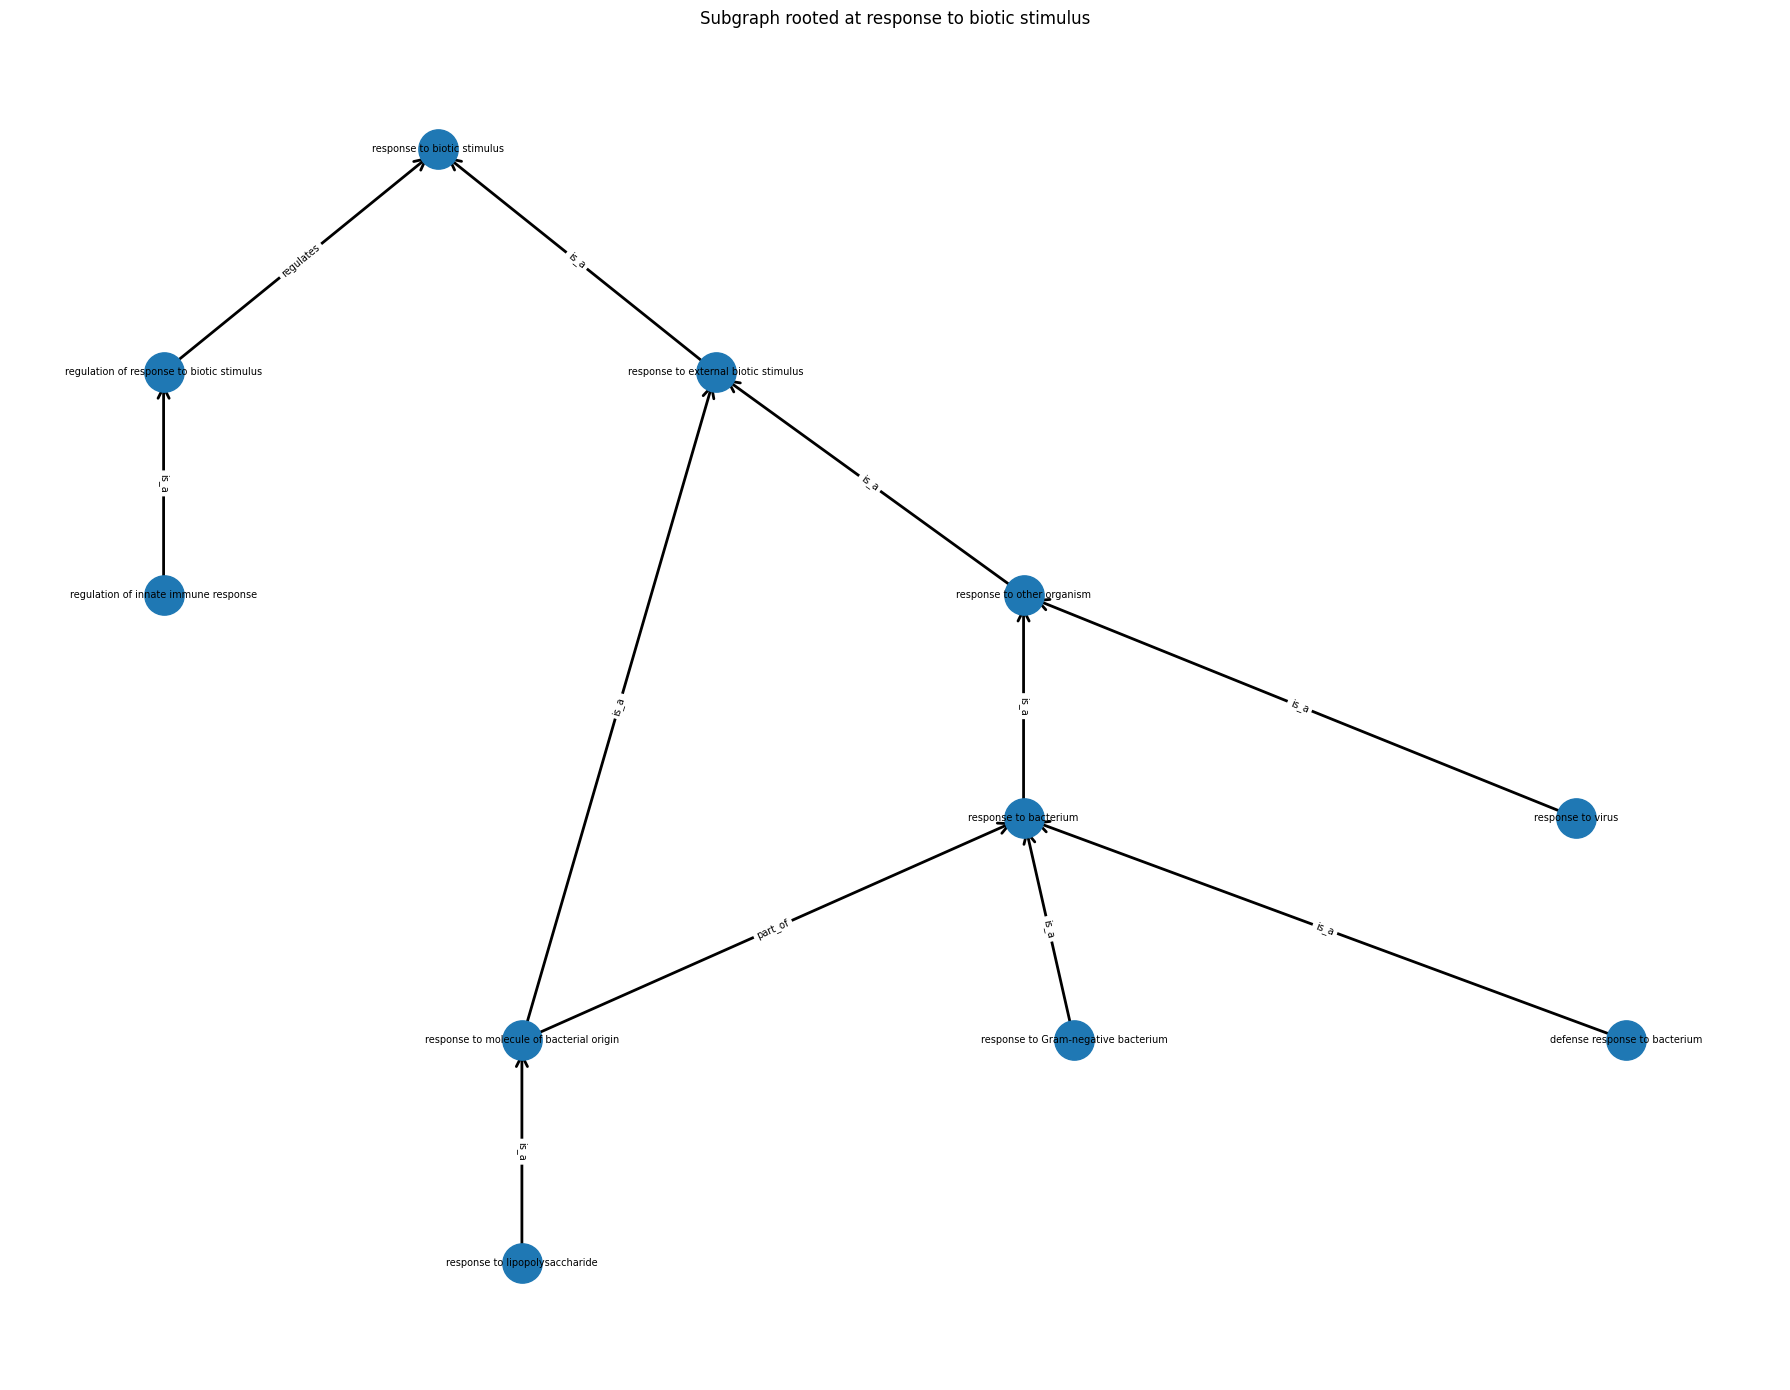

---------
[1] ColorModel({'Infliximab_drug': 'true'})
---------


In [14]:
for i, psbn_instance in enumerate(psbn.instances):
    print(f"[{i}] {psbn_instance.color}")

    intersected_goterms = psbn_instance.goterm_intersection()
    set_nodes_for_graph(intersected_goterms)

    roots, leafs = get_roots_and_leafs(intersected_goterms)
    sorted_roots, _ = sort_roots_and_leafs(roots, leafs)

    G = make_graph(intersected_goterms)
    visualize_subgraphs(G, sorted_roots[:3], intersected_goterms)
    print("---------")

## Roots and leafs

In [15]:
print_roots_and_leafs_on_whole_net(psbn)

0 leafs: []
0 roots: []


In [16]:
print_roots_and_leafs_per_instance(psbn)

ColorModel({'Infliximab_drug': 'false'})
54 leafs: [+regulation of establishment of endothelial barrier, +positive regulation of canonical NF-kappaB signal transduction, +extrinsic apoptotic signaling pathway via death domain receptors, +regulation of tumor necrosis factor-mediated signaling pathway, +cellular response to mechanical stimulus, +negative regulation of bicellular tight junction assembly, +negative regulation of canonical NF-kappaB signal transduction, +cellular response to nicotine, +toll-like receptor 3 signaling pathway, +positive regulation of execution phase of apoptosis, +protein localization to plasma membrane, +positive regulation of macrophage derived foam cell differentiation, +regulation of membrane lipid metabolic process, +positive regulation of amide metabolic process, +negative regulation of cytokine production involved in inflammatory response, +gene expression, +defense response to bacterium, +response to lipopolysaccharide, +regulation of lipid storage, +

## Unmapped ids

In [17]:
psbn.print_unmapped_ids_per_instance_per_attractor()

0: ColorModel({'Infliximab_drug': 'false'})
Apoptosis [0]
---------
1: ColorModel({'Infliximab_drug': 'true'})
Infliximab_drug,Survival [0]
---------


In [18]:
psbn.unmapped_ids_intersection_on_all_instances()

set()

In [19]:
print(f"Total numbers of attractors: {psbn.count_attractors()}")
psbn.count_unmapped_ids_frequencies_in_all_instances()

Total numbers of attractors: 2


{'Apoptosis': 1, 'Survival': 1, 'Infliximab_drug': 1}

In [20]:
for instance in psbn.instances:
  print(f"{instance.unmapped_ids_intersection()}")

{'Apoptosis'}
{'Survival', 'Infliximab_drug'}


In [21]:
for instance in psbn.instances:
  print(f"{instance.color}:\nNumber of attractors: {len(instance.attractors)}\n{instance.count_unmapped_ids_frequencies()}\n")

ColorModel({'Infliximab_drug': 'false'}):
Number of attractors: 1
{'Apoptosis': 1}

ColorModel({'Infliximab_drug': 'true'}):
Number of attractors: 1
{'Survival': 1, 'Infliximab_drug': 1}



## Fixed points

In [22]:
print_fixed_points_on_new_stg(network)

Total colors: 2
------
Total colored fixed points: 2
Total fixed point states: 2
Total fixed point colors: 2
------
Fixed point vertices turned on projection (across all colors):
{Infliximab_drug, NFKBIA, Survival}
{Apoptosis, CASP8, IKBKB, NFKB1, TNF, TNFRSF1A}
------
